# NetworkX

NetworkX to study graphs and networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

In [4]:
dataset['Returns_O'] = dataset['Open'].pct_change()
dataset['Returns_H'] = dataset['High'].pct_change()
dataset['Returns_L'] = dataset['Low'].pct_change()
dataset['Returns_V'] = dataset['Volume'].pct_change()
dataset = dataset.dropna()

## Example of Networkx

In [5]:
import networkx as nx

In [6]:
data = dataset[['Open', 'High', 'Low', 'Adj Close']]
G = nx.cycle_graph(data)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]]


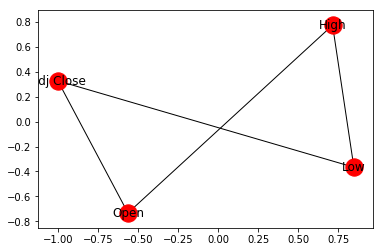

In [7]:
nx.draw_networkx(G)
plt.show()

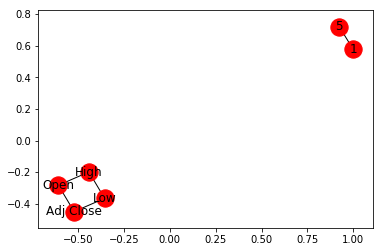

In [8]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()

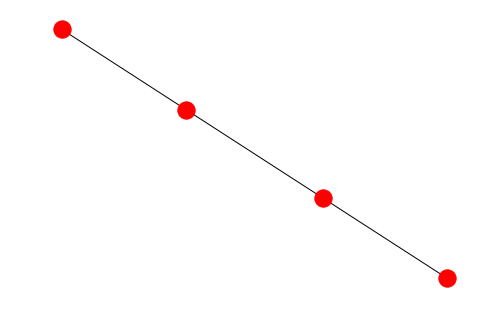

In [9]:
G = nx.path_graph(data)
nx.draw(G)
plt.show()

## Applied to Finance Data

In [10]:
# https://medium.com/@ValeriaCortezVD/visualising-stocks-correlations-with-networkx-88f2ee25362e
cor_matrix = dataset.corr()

In [11]:
cor_matrix

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Open_Close,High_Low,Returns,Returns_O,Returns_H,Returns_L,Returns_V
Open,1.000000,0.999372,0.999150,0.998353,0.998353,0.755499,0.009267,0.012163,0.020800,0.032471,0.147452,-0.001379,0.041627,0.017577,0.018993,-0.043215
High,0.999372,1.000000,0.999179,0.999278,0.999278,0.763688,0.006666,0.026715,0.019337,0.010051,0.160710,0.015276,0.038163,0.030543,0.026603,-0.034956
Low,0.999150,0.999179,1.000000,0.999394,0.999394,0.747404,0.015438,0.028220,0.019321,0.009336,0.130671,0.016478,0.036213,0.024863,0.033115,-0.045544
Close,0.998353,0.999278,0.999394,1.000000,1.000000,0.754912,0.013384,0.039791,0.017569,-0.010746,0.145408,0.032774,0.034069,0.034230,0.036423,-0.037900
Adj Close,0.998353,0.999278,0.999394,1.000000,1.000000,0.754912,0.013384,0.039791,0.017569,-0.010746,0.145408,0.032774,0.034069,0.034230,0.036423,-0.037900
Volume,0.755499,0.763688,0.747404,0.754912,0.754912,1.000000,-0.182361,0.039062,0.010197,-0.017767,0.482272,0.040908,0.072116,0.130655,-0.004347,0.250811
Increase_Decrease,0.009267,0.006666,0.015438,0.013384,0.013384,-0.182361,1.000000,0.001016,0.060326,-0.022689,-0.275840,0.034850,-0.048303,-0.050814,0.029603,-0.185315
Buy_Sell_on_Open,0.012163,0.026715,0.028220,0.039791,0.039791,0.039062,0.001016,1.000000,0.063752,-0.653439,0.012059,0.510058,-0.086445,0.275720,0.273028,0.097035
Buy_Sell,0.020800,0.019337,0.019321,0.017569,0.017569,0.010197,0.060326,0.063752,1.000000,0.068317,0.002434,-0.013406,0.077394,0.028526,0.027499,-0.011989
Open_Close,0.032471,0.010051,0.009336,-0.010746,-0.010746,-0.017767,-0.022689,-0.653439,0.068317,1.000000,-0.118646,-0.832284,0.075055,-0.515893,-0.419625,-0.233756


In [12]:
stocks = cor_matrix.index.values
cor_matrix = np.asmatrix(cor_matrix)

In [13]:
# Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

# relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

# edges with their corresponding weights
G.edges(data=True)

EdgeDataView([('Buy_Sell', 'Buy_Sell', {'weight': 1.0}), ('Buy_Sell', 'Adj Close', {'weight': 0.01756874610859583}), ('Buy_Sell', 'Buy_Sell_on_Open', {'weight': 0.06375220304632195}), ('Buy_Sell', 'High_Low', {'weight': 0.0024343688266845022}), ('Buy_Sell', 'Returns_L', {'weight': 0.02749860162656525}), ('Buy_Sell', 'Low', {'weight': 0.01932058850205413}), ('Buy_Sell', 'Increase_Decrease', {'weight': 0.0603256522506727}), ('Buy_Sell', 'Close', {'weight': 0.01756874610859583}), ('Buy_Sell', 'Returns_O', {'weight': 0.0773936051619739}), ('Buy_Sell', 'Open_Close', {'weight': 0.06831686390370963}), ('Buy_Sell', 'Volume', {'weight': 0.010197294613104556}), ('Buy_Sell', 'Returns', {'weight': -0.013406165268943818}), ('Buy_Sell', 'Open', {'weight': 0.02080018676507313}), ('Buy_Sell', 'Returns_V', {'weight': -0.011988962913729926}), ('Buy_Sell', 'Returns_H', {'weight': 0.02852601949281561}), ('Buy_Sell', 'High', {'weight': 0.019337132615995047}), ('Adj Close', 'Adj Close', {'weight': 1.0}), ('

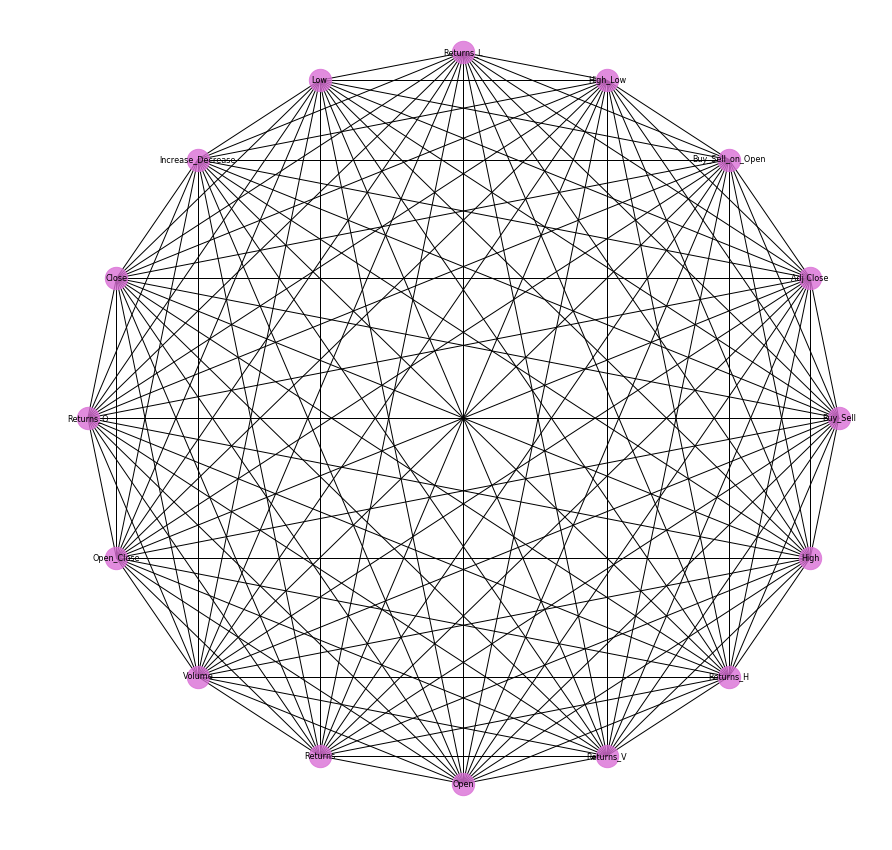

In [14]:
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    # plt.savefig("StockNetworkX.png", format="PNG")
    plt.show() 

create_corr_network_1(G)